<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture #18

In [0]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import numpy.matlib as ml

##In our last episode

* Gaussian quadrature
  * $\int W(x) f(x) dx = \sum_i w_i f(x_i)$
  * $\{x_i\}$ and $\{w_i\}$ are both chosen to provide an exact solution for Nth order polynomial f(x) multiplied by some weight function $W(x)$.
* In class example: "Two point Gauss-Legendre quadrature"
  * Exactly solves $\int [c_0 + c_1 x + c_2 x^2 + c_3 x^3] dx$
  * $W(x)=1$ (Gauss-Legendre) and $f(x)=c_0 + c_1 x + c_2 x^2 + c_3 x^3$ (4 knowns)
  * Allows choice of $\{w_0,w_1\}$ and $\{x_0,x_1\}$ (2 points, 4 unknowns)
* Choice of $\{x_i\}$ and $\{w_i\}$ depends on order of $f(x)$ and properties of various orthogonal polynomials
  * $W(x)=1 \longrightarrow $ Legendre 
  * $W(x)=e^{-x^2} \longrightarrow $ Hermite
  * $W(x)= 1/\sqrt{1-x^2} \longrightarrow $ Chebyshev
  * properties = roots and recursion relations

## Gaussian Quadrature

In general, the weighting function defines an orthogonal set of polynomials (e.g. Hermite polynomials associated with Hermite weighting function) such that
$$ \int_a^b w(x) P_m(x) P_n(x) \,dx = \delta_{mn} $$
where $m$ and $n$ are the orders of the polynomials.

You may be familiar with orthogonal functions, such as $\sin m\phi$ and $\cos n\phi$, which are orthogonal with weighting function $w(\phi) = 1$ on the interval $[-\pi, \pi]$:
$$ \int_{-\pi}^{+\pi} \sin m\phi \cos n\phi \, d\phi = 0 $$
$$ \int_{-\pi}^{+\pi} \sin m\phi \sin n\phi \, d\phi = \pi \delta_{mn} $$
$$ \int_{-\pi}^{+\pi} \cos m\phi \cos n\phi \, d\phi = \pi \delta_{mn} $$
However, here we are specifically talking about orthogonal *polynomials*.



### Recursion relations of orthogonal polynomials

Orthogonal polynomials obey recurrence relationships:
$$ a_n P_{n+1}(x) = (b_n + c_n x) P_n(x) - d_n P_{n-1}(x) $$
with $P_0(x)$ and $P_1(x)$ given.

Notice that $P_{n+1}(x)$ will always be of degree one higher than $P_n(x)$. Or, $P_n(x)$ will indeed be of degree $n$.

### Zeros of orthogonal polynomials

* Each polynomial $P_n(x)$ of degree $n$ has $n$ real zeros. Moreover, these zeros are all distinct and are all within the interval $[a,b]$.

* $P_{n+1}(x)$ has $n+1$ zeros and $P_n(x)$ has $n$ zeros, and the $n$ zeros of $P_n(x)$ lie between the $n+1$ zeros of $P_{n+1}(x)$

### Orthogonality and completeness

* Any polynomial $f_n(x)$ of degree $n$ can be expressed *uniquely* as a sum over the polynomials up to degree $n$:
$$ f_n(x) = \sum_{i=0}^n c_i P_n(x) $$

* The coefficients can be determined from the integral
$$ c_i = \int_a^b w(x) f_n(x) P_i(x) dx, \quad \mbox{for}\,0 \le i \le n  $$

* The orthogonality of the polynomials results in
$$ \int_a^b w(x) f_n(x) P_{n+m}(x) dx = 0, \quad \mbox{for}\,m>0 $$ 

### Orthogonal polynomials in Gaussian quadrature

Remember: we want
$$ I = \int_a^b w(x) f(x) dx \approx \sum_{i=0}^n w_i f(x_i) $$

It can be shown that
* The $n$ zeros of the polynomial $P_n(x)$ will be the abscissa or nodes $x_i$.
* The weights $w_i$ are defined by the weighted integral of the cardinal function $h_i(x)$ spanning the nodes $x_i$:
$$ w_i = \int_a^b w(x) h_i(x) dx, \quad \mbox{for}\,0 \le i \le n $$

The important thing is:
* $x_i$ can be calculated in advance for the relevant weighting function $w(x)$.
* $w_i$ can be calculated in advance for the weighting function and appropriate set of zeros $x_i$.

### Gauss-Legendre Quadrature

Guass-Legendre quadrature is the case for
$$ I = \int_{-1}^{+1} f(x) dx \approx \sum_{i=0}^n w_i f(x_i) $$

We can generalize to any $[a,b]$ by considering $x = \frac{b+a}{2} + \frac{b-a}{2} \xi$ with $dx = \frac{b-a}{2} d\xi$ and $\xi$ in $[-1,1]$.

Then
$$ I = \int_a^b f(x) dx \approx \frac{b-a}{2} \sum_{i=0}^n w_i f(x_i) $$
with $x_i$ now given by $x_i = \frac{a+b}{2} + \frac{b-a}{2} \xi_i$ where $\xi_i$ are the zeros.

The Legendre polynomials are defined as by:
$$ (n+1) P_{n+1}(x) = (2n+1) x P_n(x) - n P_{n-1}(x) $$
starting with $P_0(x) = 1$ and $P_1(x) = x$.

Its derivative is defined as:
$$ (1-x^2) P'_n(x) = n \big[ -x P_n(x) + P_{n-1}(x) \big] $$

In [0]:
def legendre(x, m):
  '''
  returns Legendre polynomial and its derivative of order m at points x
  '''
  p0 = np.ones_like(x) # P_{n-1}
  p1 = x   # P_{n}
  if m == 0: p = p0
  if m == 1: p = p1
  for k in range(1,m):
    p = ((2*k + 1)*x*p1 - k*p0) / (k+1)
    p0 = p1
    p1 = p
  dp = m*(p0 - x*p1) / (1.0 - x**2)
  return p, dp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


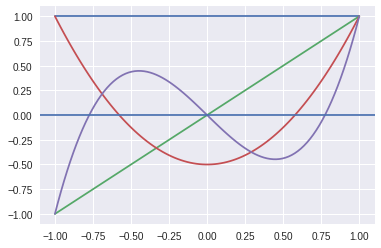

In [0]:
x = np.linspace(-1, 1, 100)
plt.plot(x,legendre(x,0)[0],x,legendre(x,1)[0],x,legendre(x,2)[0],x,legendre(x,3)[0])
plt.axhline(0)

Because $P_n(x)$ is defined on a symmetric domain and of degree $n$ we know that for $n$ odd one root will be $x_i = 0$, and the others will be symmetric around $0$. We only need to determine half of them.

The weights can be pre-calculated and are:
$$ w_i = \frac{2}{(1-x_i^2) \big[P'_{n+1}(x_i)\big]^2} $$

In [0]:
def gaussNodes(m, tol = 1e-6):
  '''
  returns nodes and weights for Gauss-Legendre quadrature of order m
  '''
  w = np.zeros(m)
  x = np.zeros(m)
  nroots = (m + 1) // 2
  for i in range(nroots):
    xbar = math.cos(math.pi * (i + 0.75) / (m + 0.5)) # approximate expression
    nmax = 30
    for j in range(nmax):
      p, dp = legendre(xbar,m)
      dxbar = -p/dp
      xbar += dxbar
      if abs(dxbar) < tol:
        x[i] = xbar
        x[m-i-1] = -x[i]
        w[i] = 2.0 / ((1.0 - xbar**2) * (dp**2))
        w[m-i-1] = w[i]
        break
  return x, w

In [0]:
gaussNodes(2)

(array([ 0.57735027, -0.57735027]), array([0.99999997, 0.99999997]))

In [0]:
def gaussQuad(f, a, b, m):
  '''
  returns the integral of f(x) from a to b using Gauss-Legendre quadrature of
  order m
  '''
  c1 = (b + a) / 2.0
  c2 = (b - a) / 2.0
  x, w = gaussNodes(m)
  sum = 0.0
  for i in range(len(x)):
    sum = sum + w[i] * f(c1 + c2*x[i])
  return c2 * sum

Previous example on $f(x) = e^{-x}$ between $[0, 1]$:

$$ I = \int_0^1 e^{-x} dx = 1 - e^{-1} $$

In [0]:
f1 = lambda x: np.exp(-x)
print("Result %12.12g found" % gaussQuad(f1, 0, 1, 4))
print("Correct result =", 1 - math.e**(-1))

Result 0.632120496393 found
Correct result = 0.6321205588285577


### Gauss-Laguerre Quadrature

Boundaries: $[a,b] = [0, +\infty[$

Recurrence relationship:
$$ (n+1) L_{n+1}(x) = (2n + 1 - x) L_n(x) - n L_{n-1}(x) $$

Derivative expression:
$$ x L'_n(x) = n \big[ L_n(x) - L_{n-1}(x) \big] $$

Weights:
$$ w_i = \frac{1}{x_i \big[L'_{n+1}(x_i)\big]^2} $$



##Multi-dimensional integrals

In [0]:
import scipy.special as sf
theta, phi = np.mgrid[0:math.pi:101j, 0:2*math.pi:101j]
plt.contour(theta, phi, np.real(sf.sph_harm(1, 1, phi, theta)), 50)

In [0]:
import scipy.integrate as ig
  xlow = 0
xhigh = math.pi
ylow = lambda x: math.pi/2.0
yhigh = lambda x : math.pi*3.0/2.0
fsph = lambda phi,theta: np.real(sf.sph_harm(1,1,phi,theta)) * np.sin(theta)
print(ig.dblquad(fsph, xlow, xhigh, ylow, yhigh))

## Solving 1st order Ordinary Differential Equations (ODEs)

Solve $ y'(t) = f(t, y) $ for $y(t)$.

###Forward Euler method

In [0]:
def solve_forward_euler(f, t, y0):
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(len(t)-1):
        y[i+1] = y[i] + f(y[i], t[i]) * (t[i+1] - t[i])
    return y

Example: $y'(t) = - y(t) * t$ with exact solution $y(t) = e^{-t^2/2}$, such that $y'(t) = -t e^{-t^2 / 2} $

In [0]:
f1 = lambda y,t: -y*t
f1_exsol = lambda t: np.exp(-0.5*t**2)
t = np.linspace(0,2,100)
plt.plot(t,f1_exsol(t))
y0 = 1
y1_solution = solve_forward_euler(f1, t, y0)
plt.plot(t,y1_solution, "--og", ms = 4)

In [0]:
plt.plot(t, f1_exsol(t) - y1_solution)

###Not bad for a few minutes of coding. Is there anything wrong with it?

###The mid-point method

###4th order Runge-Kutta